# MSYT

Analizamos el MSYT para el punto de equilibrio $P_3 = \left(\frac{m + q_2 E}{ab}, \frac{1}{a} \left( r - \frac{r(m + q_2 E)}{K ab} - q_1 E \right) \right)$ 
para los parámetros:

## Sobreviven ambas especies

In [99]:
# Parámetros biológicos
r = 1.5      # Tasa de crecimiento de presas (año⁻¹)
K = 5000.0   # Capacidad de carga (AUMENTADA para permitir x* < K)
m = 0.2      # Mortalidad natural de depredadores (REDUCIDA)
b = 0.5      # Eficiencia de conversión presa→depredador (AUMENTADA)
a = 0.002    # Tasa de depredación (AUMENTADA para que necesiten menos presas)

# Parámetros de captura
q1 = 0.0001  # Capturabilidad de presas (REDUCIDA para no colapsar la base)
q2 = 0.01    # Capturabilidad de depredadores

# Control
E_max = 500.0 # Esfuerzo máximo permitido

# Parámetros económicos
p1 = 100.0   
p2 = 200.0   
c = 50.0     
δ = 0.05     

# Vector de parámetros completo
params = [r, K, m, b, a, q1, q2, p1, p2, c, δ]

# Condiciones iniciales
x0 = 2000.0   
y0 = 300.0   

300.0

$$
\begin{align*}
  &= \left(\frac{q_1 m}{ab} + \frac{q_2 r}{a} - \frac{q_2 r m}{K a^2 b}\right)E + \left(\frac{q_1 q_2}{ab} - \frac{q_2^2 r}{K a^2 b} - \frac{q_1 q_2}{a}\right) E^2\\
  &= B E + A E^2
\end{align*}
$$

In [100]:
A = ((q1 * q2) / (a * b) - (q2^2 * r) / (K * a^2 * b) - (q1 * q2) / a)
B = ((q1 * m) / (a * b) + (q2 * r) / a - (q2 * r * m) / (K * a^2 * b))

7.22

Recordar que según el análisis, un requerimiento para la existencia de un $E^*$ tal que $Y(E^*) = MSY$ es que $A < 0$, veamos que se cumple:

In [101]:
A

-0.0145

También necesitamos que el esfuerzo $E^*$ sea positivo, lo que se cumple si la expresión
$$
B = \left(\frac{q_1 m}{ab} + \frac{q_2 r}{a} - \frac{q_2 r m}{K a^2 b}\right) > 0
$$

In [102]:
B

7.22

Con ello, el $E^*$ que maximiza el rendimiento de pesca viene dado por:
$$
E^* = \frac{-B}{2A}
$$

In [103]:
E_star = -B / (2 * A)

248.9655172413793

queremos que el equilibrio asociado a este esfuerzo sea positivo, en concreto la coordenada $y$ de este equilibrio, es decir:
$$
y^* = \frac{1}{a} \left( r - \frac{r(m + q_2 E^*)}{K ab} - q_1 E^* \right) > 0
$$

In [104]:
r - (r * (m + q2 * E_star)) / (K * a * b) - q1 * E_star

0.6682068965517242

Este $E^*$ maximiza el rendimiento de pesca (Yield):
$$
Y (E) = q_1 \frac{m + q_2 E}{ab}*E + q_2 \frac{1}{a} \left( r - \frac{r(m + q_2 E)}{K ab} - q_1 E \right)*E
$$

In [105]:
using Plots
function equilibrium_populations(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star = (m + q2 * E) / (a * b)
    y_star = (r - r / K * x_star - q1 * E) / a
    return (x_star, y_star)
end
function yield(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star, y_star = equilibrium_populations(E, params)
    Y = q1 * x_star * E + q2 * y_star * E
    return Y
end


yield (generic function with 1 method)

In [106]:
plot(e -> equilibrium_populations(e, params)[1], 0, E_max, label="Población de presas (x*)", xlabel="Esfuerzo de pesca (E)", ylabel="Población en equilibrio", legend=:topright, ylims=(-100, 3000))
plot!(e -> equilibrium_populations(e, params)[2], 0, E_max, label="Población de depredadores (y*)")
plot!(e -> yield(e, params), 0, E_max, label="Rendimiento de pesca (Y)", ylabel="Rendimiento de pesca")
vline!([E_star], label="Esfuerzo óptimo (E*)", linestyle=:dash, color=:black)
title!("Estado del equilibrio vs Esfuerzo de pesca")
savefig("MSYT_vida.pdf")

"/home/nacho/codeos/copti/pescado-controlado/MSYT_vida.pdf"

## Equilibrio con exterminio

El ejemplo anterior fué dado un set muy pequeño de parámetros, ya que se asume $q_2 >> q_1$ para la existencia de un equilibrio con ambas especies en cantidades positivas. Veamos el caso en el que $q_2$ es comparable a $q_1$, tal que trabajamos el sistema tal que si $y^* \leq 0$ entonces el equilibrio es $P_2 = \left(\frac{m + q_2 E}{ab}, 0\right)$.



In [107]:
# Parámetros del sistema presa-depredador con control de pesca
# p = [r, K, m, b, a, q1, q2, E, p1, p2, c, δ]

# Parámetros biológicos
r = 0.5      # Tasa de crecimiento de presas (año⁻¹)
K = 1000.0   # Capacidad de carga (toneladas)
m = 0.3      # Mortalidad natural de depredadores (año⁻¹)
b = 0.4      # Eficiencia de conversión presa→depredador
a = 0.001    # Tasa de depredación (toneladas⁻¹·año⁻¹)

# Parámetros de captura
q1 = 0.005  # Capturabilidad de presas
q2 = 0.01   # Capturabilidad de depredadores (más fáciles de capturar)

# Control
E_max = 3000.0 # Esfuerzo máximo permitido

# Parámetros económicos
p1 = 100.0   # Precio por tonelada de presa ($/ton)
p2 = 200.0   # Precio por tonelada de depredador ($/ton) - más valioso
c = 50.0     # Costo por unidad de esfuerzo ($/día·barco)
δ = 0.05     # Tasa de descuento anual (5%)

# Vector de parámetros completo
params = [r, K, m, b, a, q1, q2, p1, p2, c, δ]

# Condiciones iniciales razonables
x0 = 500.0   # Población inicial de presas (50% de K)
y0 = 100.0   # Población inicial de depredadores

100.0

In [108]:
A

-0.0145

In [109]:
B

7.22

In [110]:
E_star = -B/(2*A)

248.9655172413793

In [111]:
equilibrium_populations(E_star, params)[2]

-4231.896551724138

Bajo estos parámetros el modelo basado solo en $P_3$ no es suficiente, ya que para esfuerzos de pesca altos el equilibrio es $P_2$. Por lo tanto, el rendimiento de pesca queda definido por tramos:

In [112]:
function equilibrium_populations(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star = (m + q2 * E) / (a * b)
    y_star = (r - r / K * x_star - q1 * E) / a
    if y_star < 0
        x_star = (K*(r-q1 * E)) / (r)
        y_star = 0.0
    end
    return (x_star, y_star)
end
function yield(E, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    x_star, y_star = equilibrium_populations(E, params)
    Y = q1 * x_star * E + q2 * y_star * E
    return Y
end

yield (generic function with 1 method)

In [113]:
using Pkg
Pkg.add("Optim")

   Resolving package versions...
     Project No packages added to or removed from `~/codeos/copti/pescado-controlado/Project.toml`
    Manifest No packages added to or removed from `~/codeos/copti/pescado-controlado/Manifest.toml`


In [114]:
using Optim

# Función objetivo (negativa porque Optim minimiza)
objective_function(E) = -yield(E[1], params)

# Límites para el esfuerzo de pesca
lower_bounds = [0.0]
upper_bounds = [E_max]

# Valor inicial para la optimización
initial_E = [E_star]

# Optimización con restricciones de caja
result = optimize(objective_function, lower_bounds, upper_bounds, initial_E, Fminbox(LBFGS()))

# Extraer los resultados
E_opt = Optim.minimizer(result)[1]
max_yield = -Optim.minimum(result)

println("El esfuerzo óptimo es E* = ", E_opt)
println("El rendimiento máximo sostenible (MSY) es = ", max_yield)

El esfuerzo óptimo es E* = 50.00000000073676
El rendimiento máximo sostenible (MSY) es = 125.0


In [115]:
plot(e -> equilibrium_populations(e, params)[1], 0, 100, label="Población de presas (x*)", xlabel="Esfuerzo de pesca (E)", ylabel="Población en equilibrio", legend=:topright, ylims=(-100, 3000))
plot!(e -> equilibrium_populations(e, params)[2], 0, 100, label="Población de depredadores (y*)")
plot!(e -> yield(e, params), 0, 100, label="Rendimiento de pesca (Y)", ylabel="Rendimiento de pesca")
vline!([E_opt], label="Esfuerzo óptimo (E*)", linestyle=:dash, color=:black)
title!("Estado del equilibrio vs Esfuerzo de pesca")
savefig("MSYT_muerte.pdf")

"/home/nacho/codeos/copti/pescado-controlado/MSYT_muerte.pdf"

# Modelos de impuesto para la pesca

## Equilibrio Bioestable (Impuesto al esfuerzo de pesca)

Teniendo lo anterior, veremos ahora como cambian las condiciones de controlabilidad al incluir y considerar la ecuación que representa la ganancia junto con la dinámica de una forma diferente, es decir la ecuación: 

$$
    \pi_t = \pi_t(x, y, E) = (p_1x + p_2y - c)E
$$

Y en la dinámica trabajada:

$$
\begin{cases}
    0 = x(r-\frac{rx}{K} - ay - q_1E)\\
    0 = y(abx-m-q_2E)
\end{cases}
$$
Se asume  $x\neq 0$ y $y\neq 0$, obteniendo así: 
$$
\begin{cases}
    0 = r-\frac{rx}{K} - ay - q_1E\\
    0 = abx-m-q_2E
\end{cases}
$$

Donde como $q_1$ y $q_2$ son los coeficientes de capturabiolidad, y se asume que se captura a ambas especies, estos son diferentes de 0, con lo cual al despejar E se obtiene:

$$
\begin{cases}
    E = \frac{r}{q_1}-\frac{rx}{Kq_1} - \frac{ay}{q_1} \\
    E = \frac{abx}{q_2}-\frac{m}{q_2}
\end{cases}
$$

Con lo cual, podemos igualar el lado izquierdo de ambas ecuaciones resultando así en la siguiente ecuación:

$$
\begin{align*}
   \frac{abx}{q_2}-\frac{m}{q_2} &= \frac{r}{q_1}-\frac{rx}{Kq_1} - \frac{ay}{q_1} \\
   0 &= -\frac{abx}{q_2}+\frac{m}{q_2}+ \frac{r}{q_1}-\frac{rx}{Kq_1} - \frac{ay}{q_1} \\
   0 &= x\left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right) + y\left(\frac{a}{q_1}\right) - \left(\frac{m}{q_2} + \frac{r}{q_1}\right)\\
\end{align*}
$$

Donde como condición tenemos que el bioma soporta una cantidad de peces de la primera especie $0\leq x \leq K$ 

Además para que esto sea economico y biológicamente factible se requiere que se cumplan un par de condiciones, es decir que todas las constantes asumidas en el problema sean mayores a 0: 

$$
    a,b,r,K,q1​,q2​,m>0
$$

Por otro lado, con las ecuaciones anteriores se puede dejar E en función de x, e y igualmente, con lo cual: 


$$
\begin{align*}
    E &= \frac{abx}{q_2}-\frac{m}{q_2}\\
    y &= -\frac{q_1x}{a}\left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right)  + \frac{q_1}{a}\left(\frac{m}{q_2} + \frac{r}{q_1}\right)\\
\end{align*}
$$

Ahora bien, desde una perspectiva de control E puede ser negativo, pero desde una biológica y económica, debieramos tener $E(t) \geq 0$, ya que si se tiene lo contrario tendríamos un esfuerzo negativo (reponemos peces en vez de capturarlo). 

Con ello, se tiene 

$$
\begin{align*}
    0 \leq \frac{abx}{q_2}-\frac{m}{q_2}\\
    \frac{m}{ab} \leq x\\
\end{align*}
$$

Obteniendo así, la cota inferior para x, donde E es mayor igual que 0, ahora veamos que sucede con y.

En el primer caso, es decir E = 0, tenemos que no hay pesca, es decir los puntos de equilibrio son los biológicos, revisados anteriormente. Por ello, el caso interesante al utilizar esta nueva ecuación como parte de los datos es el segundo caso, es decir:

$$
\begin{align*}
    c &= p_1x + p_2y\\
    \left(\frac{m}{q_2} + \frac{r}{q_1}\right) &= x\left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right) + y\left(\frac{a}{q_1}\right)\\
\end{align*}
$$

Donde al tener 2 ecuaciones y 2 incógnitas podemos resolver el sistema.

Para resolver este sistema se utilizará la regla de Cramer, es decir, de forma matricial, para ello se definirán las constantes: 

$$
\begin{align*}
    A = \left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right)\text{, }\quad B=\left(\frac{a}{q_1}\right)\text{, }\quad C=\left(\frac{m}{q_2} + \frac{r}{q_1}\right)
\end{align*}
$$

Con ello, en forma matricial el sistema queda de la forma: 

$$
\begin{align*}
    \begin{pmatrix}
        p_1 & p_2 \\
        A & B
    \end{pmatrix}
    \begin{pmatrix}
        x \\
        y
    \end{pmatrix}
    = 
    \begin{pmatrix}
        c \\
        C
    \end{pmatrix}
\end{align*}
$$

Donde los puntos críticos se obtienen con la regla de Cramer: 

$$
\begin{align*}
    x^* = \frac{det\begin{pmatrix}
        c & p_2\\
        C & B
    \end{pmatrix}}{det \begin{pmatrix}
        p_1 & p_2 \\
        A & B
    \end{pmatrix}
    }\text{, }\quad y^* = \frac{det\begin{pmatrix}
        p_1 & c\\
        A & C
    \end{pmatrix}}{det \begin{pmatrix}
        p_1 & p_2 \\
        A & B
    \end{pmatrix}}
\end{align*}
$$

Primero resolvamos el denominador, que es el mismo para ambas expresiones:
$$
\begin{align*}
    det \begin{pmatrix}
        p_1 & p_2 \\
        A & B
    \end{pmatrix} &= Bp_1 - Ap_2\\
    &= \frac{ap_1}{q_1}-p_2\left(\frac{ab}{q_2} + \frac{r}{Kq_1}\right)\\
    &= \frac{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}{Kq_1q_2}\\
\end{align*}
$$


Ahora veamos el numerador de $x^*$:
$$
\begin{align*}
    det\begin{pmatrix}
        c & p_2\\
        C & B
    \end{pmatrix} &=cB-Cp_2\\
    &= \frac{ac}{q_1}-p_2\left(\frac{m}{q_2}+\frac{r}{q_1}\right)\\
    &= \frac{acq_2 - p_2mq_1 - rq_2p_2}{q_1q_2}\\
\end{align*}
$$
Donde al juntar ambas partes se obtiene el x de equilibrio:

$$
\begin{align*}
    x^* &= \frac{\frac{acq_2 - p_2mq_1 - rq_2p_2}{q_1q_2}}{
        \frac{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}{Kq_1q_2}}\\
    &= \frac{K(acq_2 - p_2mq_1 - rq_2p_2)}{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}
\end{align*} 
$$
Ahora procedemos a obtener el numerador de $y^*$, ya que el denominador ya es conocido:


$$
\begin{align*}
    det\begin{pmatrix}
        p_1 & c\\
        A & C
    \end{pmatrix} & = Cp_1 - cA\\
    &= p_1\left(\frac{m}{q_2}+\frac{r}{q_1}\right)- c\left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right)\\
    &= \frac{Kmp_1q_1 + Krp_1q_2 - Kcabq_1 - crq_2}{Kq_1q_2}\\
\end{align*} 
$$

Con ello, se obtiene que:
$$
\begin{align*}
    y^* &= \frac{\frac{Kmp_1q_1 + Krp_1q_2 - Kcabq_1 - crq_2}{Kq_1q_2}}{\frac{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}{Kq_1q_2}}\\
    &= \frac{Kmp_1q_1 + Krp_1q_2 - Kcabq_1 - crq_2}{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}
\end{align*} 
$$

Ahora, solo resta obtener $E^*$ para poder evaluar factibilidad biológica de este punto. Para ello se reemplaza $x^*$ en la ecuación de E, obteniendo así:

$$
\begin{align*}
E^* &= \frac{abx^*}{q_2}-\frac{m}{q_2}\\
    &= \frac{ab}{q_2}\left(\frac{K(acq_2 - p_2mq_1 - rq_2p_2)}{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}\right) - \frac{m}{q_2}\\
    &= \frac{Kab(acq_2 - p_2mq_1 - rq_2p_2) - m(Kap_1q_2 - Kabq_1p_2 - rq_2p_2)}{q_2(Kap_1q_2 - Kabq_1p_2 - rq_2p_2)}\\
\end{align*}
$$

In [116]:
# ...existing code...
# Parámetros ajustados para existencia de equilibrio positivo
r = 1.5
K = 5000.0
m = 0.2
b = 0.5
a = 0.002

# AUMENTAMOS q1 significativamente para reducir el término r/q1
q1 = 0.001  # Antes era 0.0001
q2 = 0.01

p1 = 100.0
p2 = 200.0

# AUMENTAMOS el rango de costos para encontrar la intersección
costos_range = 100:5:1000 

params_fix = [r, K, m, b, a, q1, q2, p1, p2, 0.0, 0.05] # c es variable en el loop



11-element Vector{Float64}:
    1.5
 5000.0
    0.2
    0.5
    0.002
    0.001
    0.01
  100.0
  200.0
    0.0
    0.05

┌ Info: Saved animation to /home/nacho/codeos/copti/pescado-controlado/equilibrio_costo.gif
└ @ Plots /home/nacho/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/home/nacho/codeos/copti/pescado-controlado/equilibrio_costo.gif")
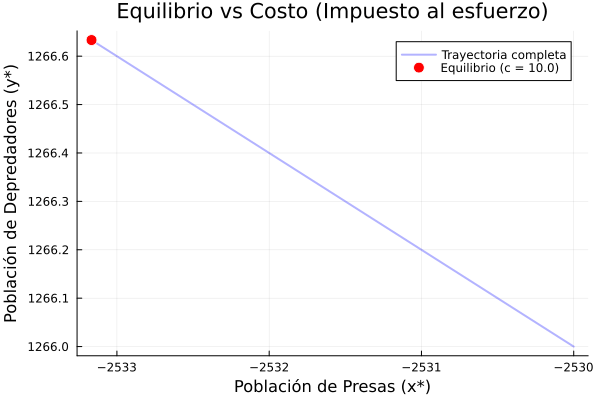

In [117]:
function equilibrio_effort(costo, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    c = costo
    x = K*(a*c*q2-p2*m*q1-r*q2*p2)/(K*a*p1*q2 - K*a*b*q1*p2 - r*q2*p2)
    y = (K*m*p1*q1 + K*r*p1*q2 - K*c*a*b*q1 - c*r*q2)/(K*a*p1*q2 - K*a*b*q1*p2 - r*q2*p2)
    return x, y
end
costos_range = 10:0.5:200

puntos = [equilibrio_effort(c, params_fix) for c in costos_range]
xs = [p[1] for p in puntos]
ys = [p[2] for p in puntos]

anim = @animate for (i, c_val) in enumerate(costos_range)
    # Punto actual
    x_curr, y_curr = xs[i], ys[i]
    
    # Graficar la trayectoria completa como referencia (fondo tenue)
    plot(xs, ys, 
         xlabel="Población de Presas (x*)", 
         ylabel="Población de Depredadores (y*)",
         label="Trayectoria completa",
         lw=2, color=:blue, alpha=0.3,
         legend=:topright,)
        #  xlims=(minimum(xs)*0.9, maximum(xs)*1.1), # Fijar límites para evitar saltos
        #  ylims=(minimum(ys)*0.999, maximum(ys)*1.001))
    
    # Graficar la trayectoria recorrida hasta el momento (más fuerte)
    plot!(xs[1:i], ys[1:i], 
          lw=2, color=:blue, label=nothing)

    # Graficar el punto actual
    scatter!([x_curr], [y_curr], 
             label="Equilibrio (c = $(round(c_val, digits=1)))", 
             color=:red, markersize=6, markerstrokecolor=:white)
             
    title!("Equilibrio vs Costo (Impuesto al esfuerzo)")
end

# Guardar el GIF
gif(anim, "equilibrio_costo.gif", fps = 15)
# plot(xs, ys, 
#      xlabel="Población de Presas (x*)", 
#      ylabel="Población de Depredadores (y*)",
#      label="Trayectoria de equilibrio (variando c)",
#      title="Espacio de Fase del Equilibrio",
#      lw=2, marker=:circle, markersize=2)
# plot(c -> equilibrio_effort(c, params)[1], 10, 200, label="Población de presas en equilibrio (x*)", xlabel="Costo por unidad de esfuerzo (c)", ylabel="Población en equilibrio", legend=:topright, size=(800, 600))


$$
\begin{align*}
E^* &= \frac{abx^*}{q_2}-\frac{m}{q_2}\\
    &= \frac{ab}{q_2}\left(\frac{K(acq_2 - p_2mq_1 - rq_2p_2)}{Kap_1q_2 - Kabq_1p_2 - rq_2p_2}\right) - \frac{m}{q_2}\\
    &= \frac{Kab(acq_2 - p_2mq_1 - rq_2p_2) - m(Kap_1q_2 - Kabq_1p_2 - rq_2p_2)}{q_2(Kap_1q_2 - Kabq_1p_2 - rq_2p_2)}\\
\end{align*}
$$

In [118]:
function esfuerzo_optimo(costo, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    c = costo
    x = equilibrio_effort(c, params)[1]
    # num = K*a*b*(a*c*q2-p2*m*q1 - r*q2*p2) - m*(K*a*p1*q2 - K*a*b*q1*p2 - r*q2*p2)
    # den = q2*(K*a*p1*q2 - K*a*b*q1*p2-r*q2*p2)
    return (a*b*x)/q2 - m/q2
end

plot(c -> esfuerzo_optimo(c, params_fix), 0, 200, label="Esfuerzo de pesca óptimo (E*)", xlabel="Costo por unidad de esfuerzo (c)", ylabel="Esfuerzo de pesca óptimo (E*)", title="Esfuerzo de pesca óptimo vs Costo por unidad de esfuerzo", legend=:topright, size=(800, 600))
savefig("esfuerzo_vs_impuestoesfuerzo.png")

"/home/nacho/codeos/copti/pescado-controlado/esfuerzo_vs_impuestoesfuerzo.png"

## Equilibrio con beneficio basado en captura (Impuesto a la captura)

Consideremos ahora una función de beneficio donde se aplica un impuesto $\lambda$ por unidad de biomasa capturada. La ecuación de beneficio es:

$$
    \pi_t = (q_1(p_1-\lambda) x + q_2(p_2-\lambda) y)E
$$

Bajo la condición de equilibrio bioeconómico (renta cero), tenemos que $\pi_t = 0$. Asumiendo $E > 0$, esto implica:

$$
    q_1(p_1-\lambda) x + q_2(p_2-\lambda) y = 0
$$

Esta ecuación define la **isoclina económica**, que en este caso es una recta que pasa por el origen. Nota: Para que exista una solución no trivial en el primer cuadrante ($x,y > 0$), es necesario que los términos $(p_1-\lambda)$ y $(p_2-\lambda)$ tengan signos opuestos (es decir, una especie es rentable y la otra genera pérdidas que se compensan, como en el caso de captura incidental subvencionada o multada).

Por otro lado, la **isoclina biológica** (derivada de $\dot{x}=0, \dot{y}=0$ eliminando $E$) se mantiene igual:

$$
    x\left(\frac{ab}{q_2}+\frac{r}{Kq_1}\right) + y\left(\frac{a}{q_1}\right) = \frac{m}{q_2} + \frac{r}{q_1}
$$

El punto de equilibrio $(x^*, y^*)$ es la intersección de ambas rectas. El sistema lineal es:

$$
\begin{pmatrix}
q_1(p_1-\lambda) & q_2(p_2-\lambda) \\
\frac{ab}{q_2} + \frac{r}{Kq_1} & \frac{a}{q_1}
\end{pmatrix}
\begin{pmatrix}
x^* \\
y^*
\end{pmatrix}
=
\begin{pmatrix}
0 \\
\frac{m}{q_2} + \frac{r}{q_1}
\end{pmatrix}
$$

Calculamos el determinante de la matriz de coeficientes $\Delta$:

$$
\begin{align*}
\Delta &= q_1(p_1-\lambda)\left(\frac{a}{q_1}\right) - q_2(p_2-\lambda)\left(\frac{ab}{q_2} + \frac{r}{Kq_1}\right) \\
&= a(p_1-\lambda) - (p_2-\lambda)\left(ab + \frac{rq_2}{Kq_1}\right)
\end{align*}
$$

Usando la regla de Cramer para resolver el sistema (notando que el primer término del vector de constantes es 0):

Para $x^*$:
$$
x^* = \frac{\det\begin{pmatrix} 0 & q_2(p_2-\lambda) \\ \frac{m}{q_2} + \frac{r}{q_1} & \frac{a}{q_1} \end{pmatrix}}{\Delta} = \frac{- q_2(p_2-\lambda)(\frac{m}{q_2} + \frac{r}{q_1})}{\Delta} = \frac{-(p_2-\lambda)(m + \frac{rq_2}{q_1})}{\Delta}
$$

Para $y^*$:
$$
y^* = \frac{\det\begin{pmatrix} q_1(p_1-\lambda) & 0 \\ \frac{ab}{q_2} + \frac{r}{Kq_1} & \frac{m}{q_2} + \frac{r}{q_1} \end{pmatrix}}{\Delta} = \frac{q_1(p_1-\lambda)(\frac{m}{q_2} + \frac{r}{q_1})}{\Delta} = \frac{(p_1-\lambda)(\frac{mq_1}{q_2} + r)}{\Delta}
$$


Reemplazando $x^*,y^*$ en el equilibrio biológico para encontrar $E^*$:
$$
E^* = \frac{abx^* - m}{q_2} = \frac{ab\left(\frac{-(p_2-\lambda)(m + \frac{rq_2}{q_1})}{\Delta}\right) - m}{q_2}
$$

In [119]:
function equilibrio_pesca(lambda, params)
    r, K, m, b, a, q1, q2, p1, p2, c, δ = params
    λ = lambda
    Δ = a*(p1-λ) - (p2-λ)*(a*b*(r*q2)/(K*q1))
    
    x_star = ( - (p2 - λ)*( m + (r*q2)/q1 ) ) / Δ
    y_star = ( (p1 - λ)*( (m*q1/q2) + r ) ) / Δ
    E_star = (a*b*x_star)/q2 - m/q2
    return x_star, y_star, E_star
end

equilibrio_pesca (generic function with 1 method)

┌ Info: Saved animation to /home/nacho/codeos/copti/pescado-controlado/equilibrio_precio_dep.gif
└ @ Plots /home/nacho/.julia/packages/Plots/8ZnR3/src/animation.jl:156


Plots.AnimatedGif("/home/nacho/codeos/copti/pescado-controlado/equilibrio_precio_dep.gif")
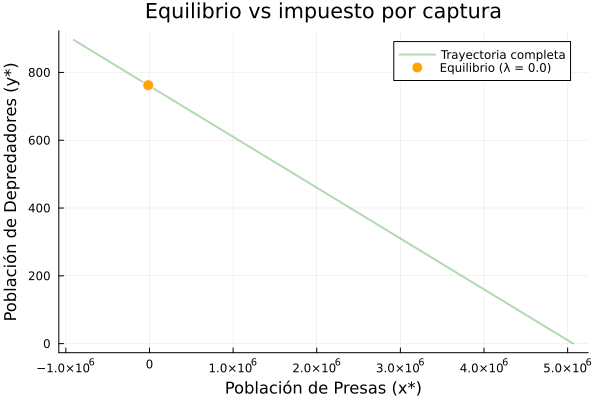

In [120]:
puntos = [equilibrio_pesca(λ, params_fix) for λ in 0:1:150]
xs = [p[1] for p in puntos]
ys = [p[2] for p in puntos]
Es = [p[3] for p in puntos]

anim = @animate for (i, λ_val) in enumerate(0:1:150)
    # Punto actual
    x_curr, y_curr, E_curr = xs[i], ys[i], Es[i]
    
    # Graficar la trayectoria completa como referencia (fondo tenue)
    plot(xs, ys, 
         xlabel="Población de Presas (x*)", 
         ylabel="Población de Depredadores (y*)",
         label="Trayectoria completa",
         lw=2, color=:green, alpha=0.3,
         legend=:topright,)
        #  xlims=(minimum(xs)*0.9, maximum(xs)*1.1), # Fijar límites para evitar saltos
        #  ylims=(minimum(ys)*0.999, maximum(ys)*1.001))
    
    # Graficar la trayectoria recorrida hasta el momento (más fuerte)
    plot!(xs[1:i], ys[1:i], 
          lw=2, color=:green, label=nothing)

    # Graficar el punto actual
    scatter!([x_curr], [y_curr], 
             label="Equilibrio (λ = $(round(λ_val, digits=1)))", 
             color=:orange, markersize=6, markerstrokecolor=:white)
             
    title!("Equilibrio vs impuesto por captura")
end
# Guardar el GIF
gif(anim, "equilibrio_precio_dep.gif", fps = 15)

In [121]:
plot(0:1:150, Es, 
    xlabel="Impuesto por captura (λ)", 
    ylabel="Esfuerzo de pesca en equilibrio (E*)",
    label="Relación λ vs E*",
    title="Esfuerzo en equilibrio vs impuesto por captura",
    lw=2, marker=:circle, markersize=2,)

savefig("esfuerzo_vs_impuestocaptura.png")

"/home/nacho/codeos/copti/pescado-controlado/esfuerzo_vs_impuestocaptura.png"